In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people

In [40]:
# Load data
faces = fetch_lfw_people(min_faces_per_person=50).data
# what the fetch_lfw_people return is a matrix of K rows containing K faces
# each row is a row vector that has M*N matricies
faces = np.array(faces)

In [41]:
image_height = 62
image_width = 47
number_images = np.shape(faces)[0]
print("We have " + str(number_images) + " images, each of which is " + 
      str(image_height) + " by " + str(image_width)  + " pixels.")

We have 820 images, each of which is 62 by 47 pixels.


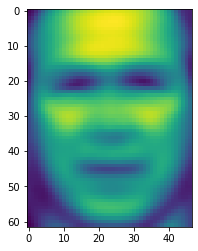

In [48]:
# mean face:
normalizer = (1/number_images)*np.ones((number_images,1))
mean_face = np.dot(faces.T, normalizer)
mean_face = mean_face.reshape(image_height, image_width)
plt.imshow(mean_face)